In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

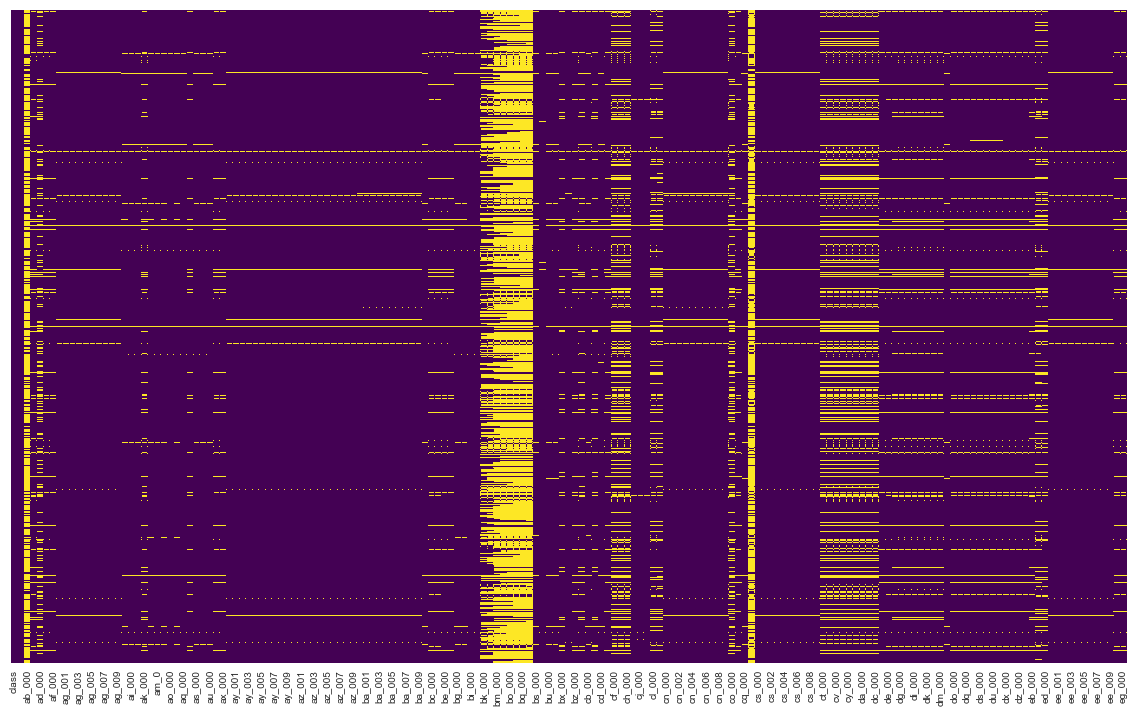

In [3]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>Second Approach</b>

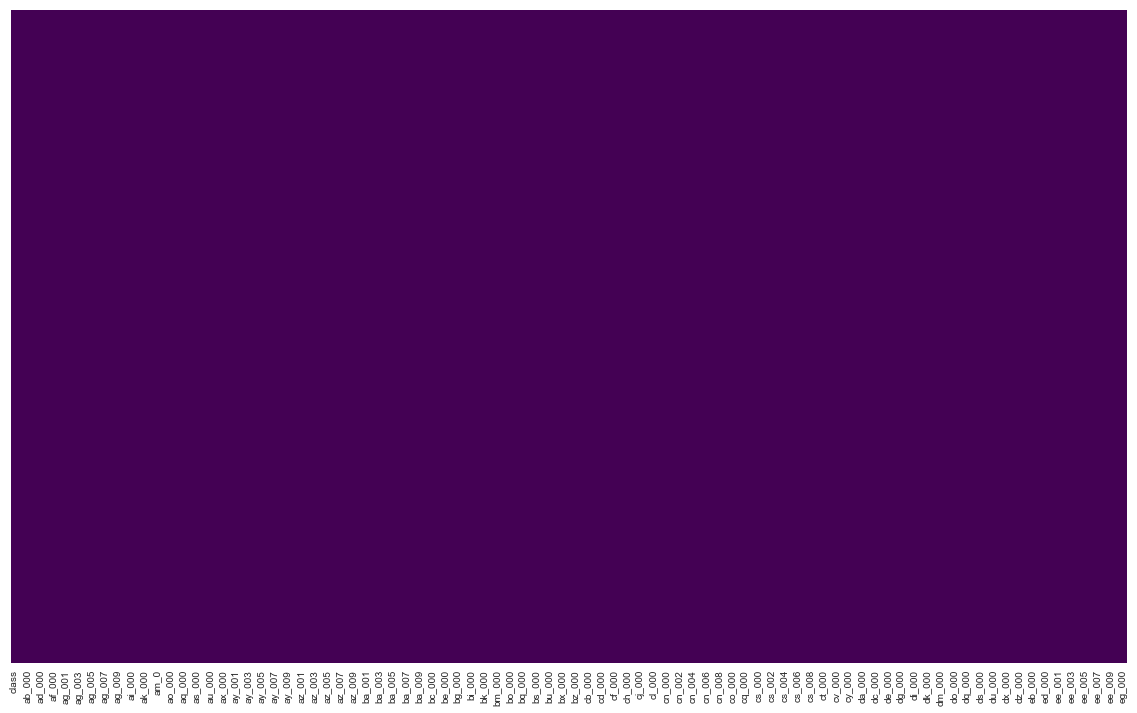

In [4]:
sample_training_data = training_data
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [6]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


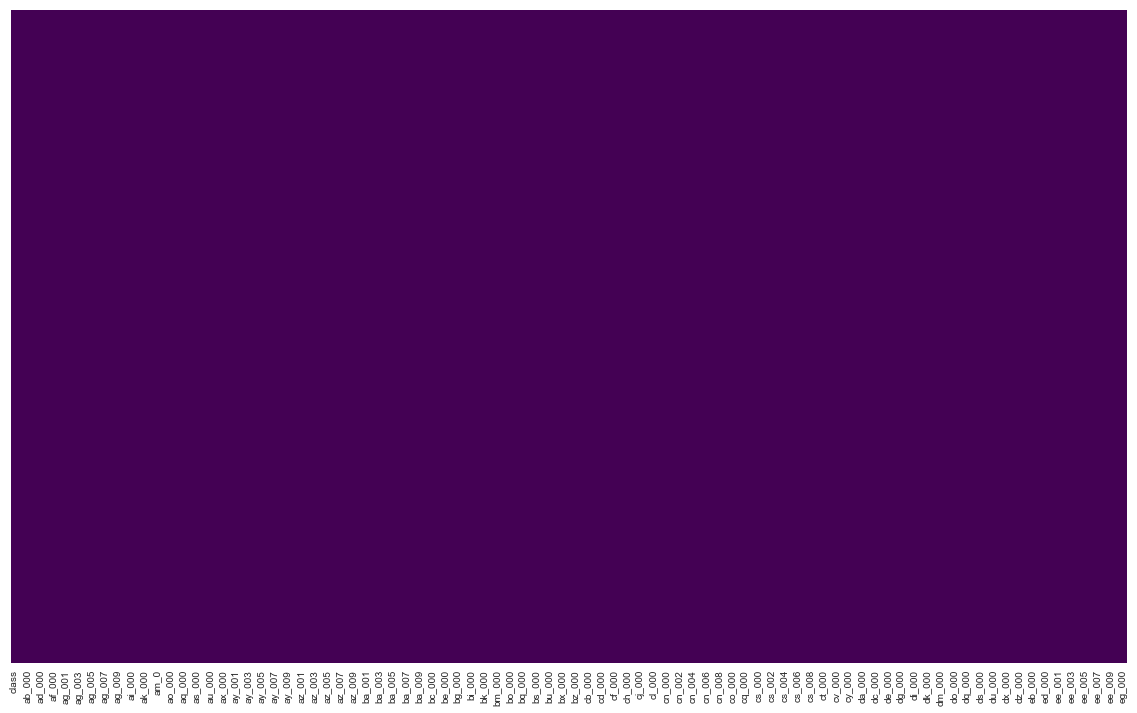

In [7]:
sample_testing_data = testing_data
sample_testing_data.fillna(sample_testing_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# From personal Experiment

In [8]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data = sample_testing_data.replace('neg',0)
sample_testing_data = sample_testing_data.replace('pos',1)

sample_testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [74]:
testData_X = sample_testing_data.drop('class',axis=1)
testData_y = sample_testing_data['class']


In [47]:
df = sample_training_data.copy()

In [48]:
X, y = df.iloc[:,1:], df.iloc[:,0]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size = 0.2, random_state = 0)

weight = sum(y_tr == 0)/sum(y_tr == 1)
lr_full = LogisticRegression(C = 1, class_weight={1:weight}, random_state = 0)
lr_full.fit(X_tr, y_tr)
y_pred = lr_full.predict(X_t)

#calculate the score using confusion matrix values
def score(cm):
    cm_score = cm[0][1] * 10 + cm[1][0] * 500
    cm_score = int(cm_score * 1.33) #1.33 is because the actual test set is 33% larger than this test set
    return cm_score
#calculate confusion matrix
cm = confusion_matrix(y_t, y_pred)
score(cm)

17024

In [52]:
X, y = df.iloc[:,1:], df.iloc[:,0]
#X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size = 0.2, random_state = 0)

weight = sum(y == 0)/sum(y == 1)
lr_full = LogisticRegression(C = 1, class_weight={1:weight}, random_state = 0)
lr_full.fit(X, y)


#calculate the score using confusion matrix values
def score(cm):
    cm_score = cm[0][1] * 10 + cm[1][0] * 500
    cm_score = int(cm_score * 1.33) #1.33 is because the actual test set is 33% larger than this test set
    return cm_score


In [54]:
y_pred = lr_full.predict(testData_X)

In [56]:
#calculate confusion matrix
cm = confusion_matrix(testData_y, y_pred)
score(cm)

22862

In [57]:
#testing scaling
df = sample_training_data.copy()

from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X, y = df.iloc[:,1:], df.iloc[:,0]
X_scaled = scaler_minmax.fit_transform(X.values)
X_tr, X_t, y_tr, y_t = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

weight = sum(y_tr == 0)/sum(y_tr == 1)
lr_full = LogisticRegression(C = 1, class_weight={1:weight}, random_state = 0)
lr_full.fit(X_tr, y_tr)
y_pred = lr_full.predict(X_t)

#calculate confusion matrix
cm = confusion_matrix(y_t, y_pred)
score(cm)

15082

In [59]:
#tuning hyperparameters for Logistic Regression
df = sample_training_data.copy()
X, y = df.iloc[:,1:], df.iloc[:,0]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size = 0.2, random_state = 0)
Cs = list(np.arange(0.1, 1, 0.1))
weight = sum(y_tr == 0)/sum(y_tr == 1)
for C_ in Cs:  
    lr_full = LogisticRegression(C = C_, class_weight={1:weight}, random_state = 0)
    lr_full.fit(X_tr, y_tr)
    y_pred = lr_full.predict(X_t)

    #calculate confusion matrix
    cm = confusion_matrix(y_t, y_pred)
    score(cm)
    print("C is {0}. Score is: {1}".format(C_, score(cm)))

C is 0.1. Score is: 16917
C is 0.2. Score is: 16678
C is 0.30000000000000004. Score is: 16385
C is 0.4. Score is: 17024
C is 0.5. Score is: 17010
C is 0.6. Score is: 15640
C is 0.7000000000000001. Score is: 16984
C is 0.8. Score is: 17037
C is 0.9. Score is: 16970


In [95]:
#testing scaling
df = sample_training_data.copy()

#from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X, y = df.iloc[:,1:], df.iloc[:,0]


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

scalerTest = StandardScaler()
scalerTest.fit(testData_X)
X_test_scaled = scalerTest.transform(testData_X)


weight = sum(y == 0)/sum(y == 1)
lr_full = LogisticRegression(C =0.6 , class_weight={1:weight}, random_state = 0)
lr_full.fit(X_scaled,np.ravel(y))
y_pred = lr_full.predict(X_test_scaled)

#calculate confusion matrix
cm = confusion_matrix(testData_y, y_pred)
score(cm)

35657

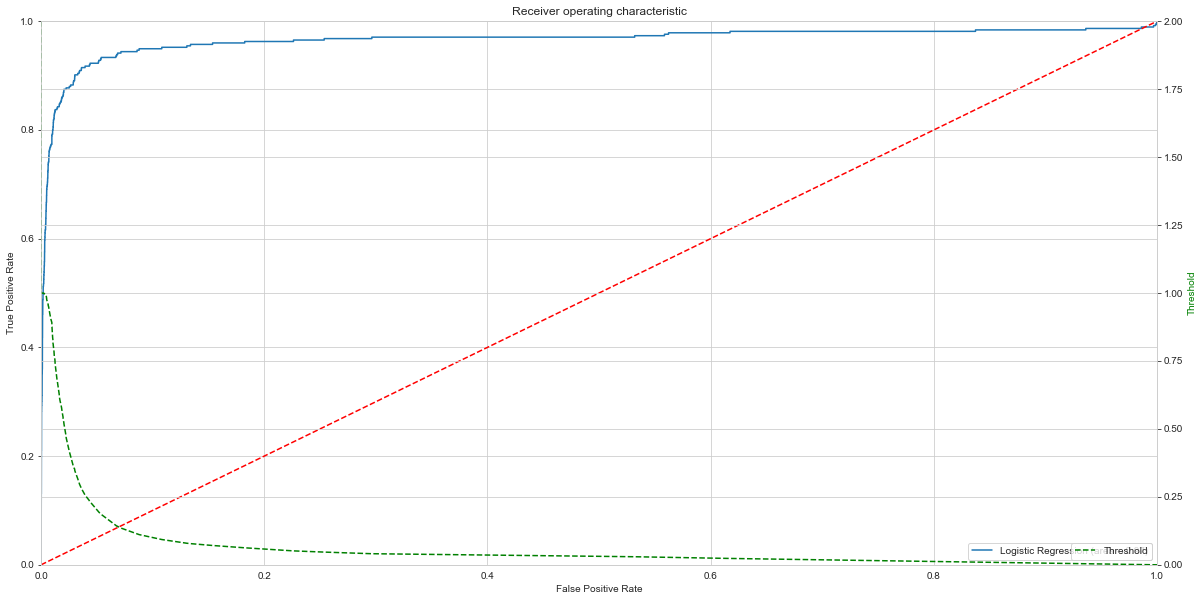

In [102]:
logit_roc_auc = roc_auc_score(testData_y, lr_full.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(testData_y,lr_full.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')


# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
ax2.set_ylabel('Threshold',color='g')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.legend(loc="lower right")
plt.savefig('roc_and_threshold.png')
plt.show()

In [103]:
#wtih different threshold
THRESHOLD = 0.253#optimal one chosen manually with test train split

thresholdTestingPrediction = np.where(lr_full.predict_proba(X_test_scaled)[:,1] > THRESHOLD, 1,0)


testing_tn, testing_fp, testing_fn, testing_tp = confusion_matrix(testData_y,thresholdTestingPrediction).ravel()
testing_cost = 10*testing_fp+500*testing_fn
testing_values = {'Score':[testing_cost],'Number of Type 1 faults':[testing_fp],'Number of Type 2 faults':[testing_fn]}
pd.DataFrame(testing_values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,21780,628,31


In [104]:
evaluationScored(testData_y,thresholdTestingPrediction)



Scores
   Accuracy Score        R2        F1       MSE
0        0.958812 -0.799509  0.510765  0.041188


In [208]:
df = sample_training_data.copy()

X_train, y_train = df.iloc[:,1:], df.iloc[:,0]
X_train_scaled = scaler_minmax.fit_transform(X_train.values)
#calculation of the score for the actual test set
weight = sum(y_train == 0)/sum(y_train == 1)
log_reg = LogisticRegression(class_weight = {1:weight}, C = 0.6, random_state=1)
log_reg.fit(X_train_scaled, y_train)



X_test = testData_X
y_test = testData_y

X_test_scaled = scaler_minmax.transform(X_test.values)
#predict the class for the test set
y_test_pred = log_reg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_test_pred)
def score(cm):
    cm_score = cm[0][1] * 10 + cm[1][0] * 500
    cm_score = int(cm_score)
    return cm_score
score(cm)

16000

In [219]:
#wtih different threshold
THRESHOLD = 0.42 #optimal one chosen manually

thresholdPrediction = np.where(log_reg.predict_proba(X_test_scaled)[:,1] > THRESHOLD, 1,0)


tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,15040,554,19


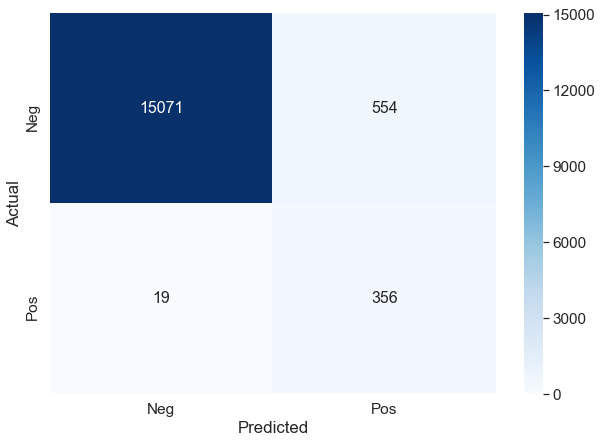

In [250]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true = ["Pos", "Neg"]
y_pred = ["Pos", "Neg"]
data = confusion_matrix(y_test, thresholdPrediction)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [244]:
tn, fp, fn, tp = confusion_matrix(y_test, thresholdPrediction).ravel()
confusionData = [[tn,fp],[fn,tp]]
pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP'])

,FN,FP
TN,15071,554
TP,19,356


In [252]:
evaluationScored(y_test,thresholdPrediction)



Scores
   Accuracy Score        R2        F1       MSE
0        0.964187 -0.564672  0.554086  0.035812


In [184]:
#final threshold
df = sample_training_data.copy()

X, y = df.iloc[:,1:], df.iloc[:,0]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.33, random_state=42)


X_tr_scaled = scaler_minmax.fit_transform(X_tr.values)
X_t_scaled = scaler_minmax.fit_transform(X_t.values)

In [185]:
#calculation of the score for the actual test set
weight = sum(y_tr == 0)/sum(y_tr == 1)
log_reg = LogisticRegression(class_weight = {1:weight}, C = 0.6, random_state=1)
log_reg.fit(X_tr_scaled, y_tr)

LogisticRegression(C=0.6, class_weight={1: 59.17964071856287}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

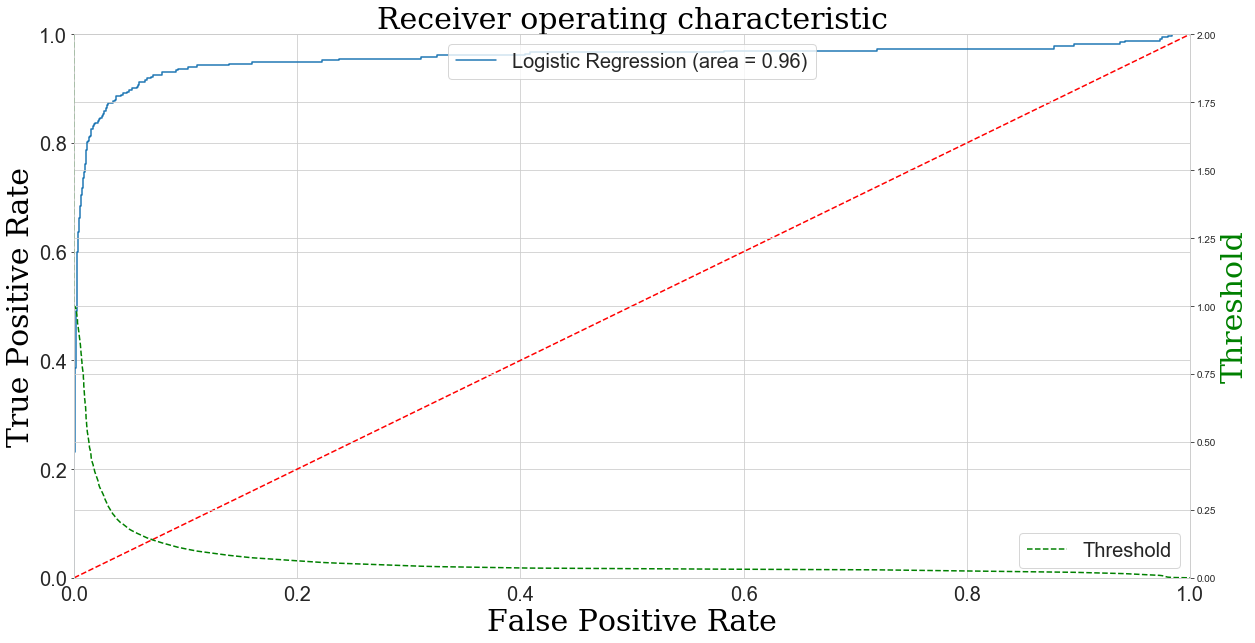

In [194]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }


logit_roc_auc = roc_auc_score(y_t, log_reg.predict_proba(X_t_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_t,log_reg.predict_proba(X_t_scaled)[:,1])
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.title('Receiver operating characteristic',fontdict=font)
plt.legend(loc="upper center",prop ={"size" : 20})
plt.savefig('Log_ROC')

plt.tick_params(axis='both', which='major', labelsize=20)


# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
ax2.set_ylabel('Threshold',color='g',fontdict=font)
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
plt.legend(loc="lower right",prop = {"size" : 20})
plt.savefig('roc_and_threshold.png')
plt.show()

In [207]:
#wtih different threshold
THRESHOLD = 0.43 #optimal one chosen manually

thresholdPrediction = np.where(log_reg.predict_proba(X_t_scaled)[:,1] > THRESHOLD, 1,0)


tn, fp, fn, tp = confusion_matrix(y_t,thresholdPrediction).ravel()
cost = 10*fp+500*fn
values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
pd.DataFrame(values)

,Score,Number of Type 1 faults,Number of Type 2 faults
0,32140,314,58


In [106]:
getCost(y_test,y_test_pred)

Confusion Matrix

       FN   FP
TN  15125  500
TP     22  353


Cost

   Score  Number of Type 1 faults  Number of Type 2 faults
0  16000                      500                       22


In [126]:
getCostWithThreshold(X_test_scaled,y_test,y_test_pred,0.253,log_reg)

   Score  Number of Type 1 faults  Number of Type 2 faults
0  15560                     1106                        9


In [127]:
evaluationScored(y_test,y_test_pred)



Scores
   Accuracy Score        R2        F1       MSE
0        0.967375 -0.425408  0.574919  0.032625


In [136]:
C = []
scores = []

In [221]:
#tuning hyperparameters for Logistic Regression
df = sample_training_data.copy()
X, y = df.iloc[:,1:], df.iloc[:,0]
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size = 0.2, random_state = 0)
Cs = list(np.arange(0.1, 2, 0.1))
weight = sum(y_tr == 0)/sum(y_tr == 1)
for C_ in Cs:  
    lr_full = LogisticRegression(C = C_, class_weight={1:weight}, random_state = 0)
    lr_full.fit(X_tr, y_tr)
    y_pred = lr_full.predict(X_t)

    #calculate confusion matrix
    cm = confusion_matrix(y_t, y_pred)
    scores.append(score(cm))
    #print("C is {0}. Score is: {1}".format(C_, score(cm)))
    C.append(C_)

In [222]:
C

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000001,
 1.5000000000000002,
 1.6,
 1.7000000000000002,
 1.8000000000000003,
 1.9000000000000001,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000001,
 1.5000000000000002,
 1.6,
 1.7000000000000002,
 1.8000000000000003,
 1.9000000000000001]

In [241]:
scores

[12720,
 12540,
 12320,
 12800,
 12790,
 11760,
 12770,
 12810,
 12760,
 12720,
 12540,
 12320,
 12800,
 12790,
 11760,
 12770,
 12810,
 12760,
 12800,
 12030,
 12800,
 11770,
 12510,
 12680,
 11780,
 12830,
 12740,
 11750,
 12720,
 12540,
 12320,
 12800,
 12790,
 11760,
 12770,
 12810,
 12760,
 12800,
 12030,
 12800,
 11770,
 12510,
 12680,
 11780,
 12830,
 12740,
 11750]

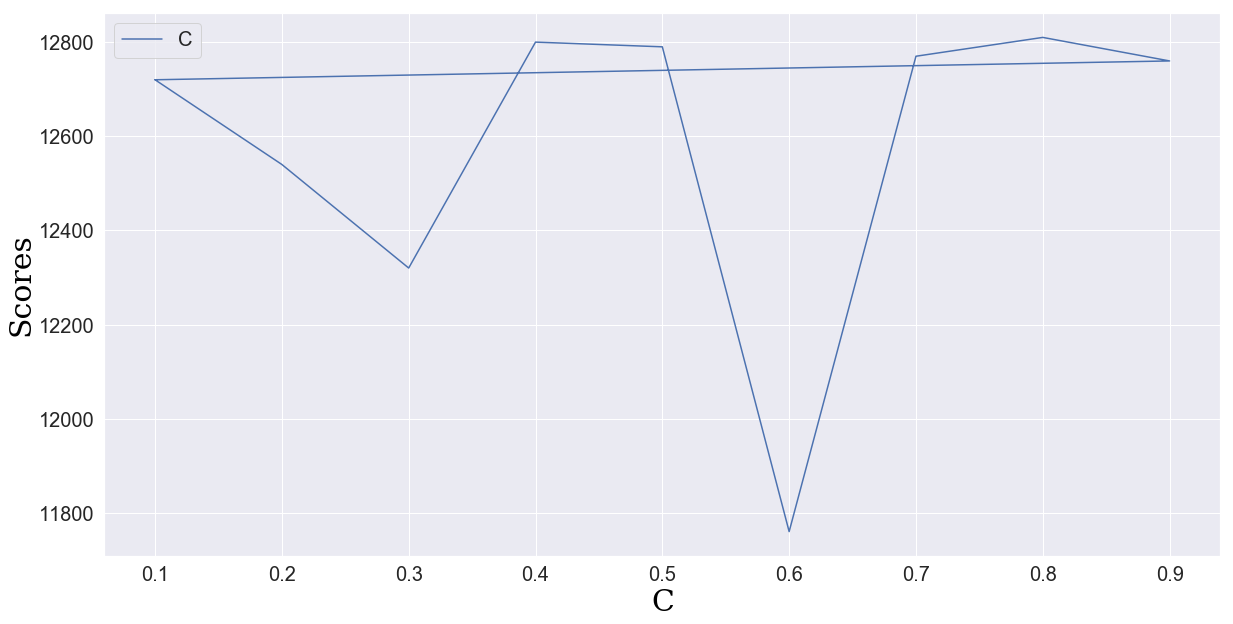

In [239]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

plt.figure(figsize=(20,10))
plt.plot(C[:10],scores[:10],label = "C")
plt.xlabel("C",fontdict=font)
plt.ylabel("Scores",fontdict= font)
plt.legend(loc= "upper left",prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=20)


# Implemented Methods 

In [9]:
def getCost(y_test,prediction):
    '''
    evaluate the total cost without modified threshold
    '''
    tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
    confusionData = [[tn,fp],[fn,tp]]
    print("Confusion Matrix\n")
    print(pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP']))
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    print("\n\nCost\n")
    print(pd.DataFrame(values))

In [109]:
def getCostWithThreshold(X_test,y_test,prediction,threshold,model):
    """
    evaluate the total cost with modified threshold
    model = model instance
    """
    THRESHOLD = threshold #optimal one chosen from the roc curve
    thresholdPrediction = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1,0)
    tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    print(pd.DataFrame(values))

In [11]:
def aucForThreshold(X_test,y_test,model):
    """
    return roc auc curve for determining the optimal threshold
    model = desired model's instance
    """
    from sklearn.metrics import roc_auc_score,roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper center")
    plt.savefig('Log_ROC')


    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
    ax2.set_ylabel('Threshold',color='g')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.legend(loc="lower right")
    plt.savefig('roc_and_threshold.png')
    plt.show()

In [12]:
def evaluationScored(y_test,prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    r2 = metrics.r2_score(y_test, prediction)
    f1 = metrics.f1_score(y_test, prediction)
    mse = metrics.mean_squared_error(y_test, prediction)
    values = {'Accuracy Score':[acc],'R2':[r2],'F1':[f1],'MSE':[mse]}
    print("\n\nScores")
    print (pd.DataFrame(values))
    

In [13]:
from sklearn.metrics.scorer import make_scorer


def my_scorer(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost


my_func = make_scorer(my_scorer, greater_is_better=False)

In [14]:
def predictionWithStandardScaling(testingData):
    scalerTesting = StandardScaler()
    scalerTesting.fit(X_test)
    X_test_scaled = scalerTesting.transform(X_test)
    pipePrediction = pipeTesting.predict(X_test_scaled)
    return pipePrediction

# Data Standardization

<b> We are going to implement SVM and that requires Standardiation of Data -- Feature Scaling
</b>

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = sample_training_data.drop('class',axis=1)
y = sample_training_data['class']

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA AND PARAMETERS OPTIMISATION PIPELINED

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
pca = PCA()
log_model = LogisticRegression()

In [21]:
pipe = Pipeline(steps=[("pca",pca),("log_model",log_model)])

In [25]:
param_grid = {
    'pca__n_components': range(10,26),
    'log_model__C': [0.1,0.2,0.3,0.4,0.5],
}

In [26]:
gridModel = GridSearchCV(pipe, param_grid, iid=False, cv=3, return_train_score=False, scoring = my_func, n_jobs=-1, verbose=3)

In [27]:
gridModel.fit(X_scaled, np.ravel(y))

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('log_model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'pca__n_components': range(10, 26), 'log_model__C': [0.1, 0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(my_scorer, greater_is_better=False), verbose=3)

In [28]:
print("Best parameter (CV score=%0.3f):" % gridModel.best_score_)

Best parameter (CV score=-85076.667):


In [29]:
print(gridModel.best_params_)

{'log_model__C': 0.1, 'pca__n_components': 25}


In [30]:
X_test = sample_testing_data.drop('class',axis=1)
y_test = sample_testing_data['class']

In [31]:
grid_prediction = gridModel.predict(X_test)

In [32]:
my_scorer(y_test,grid_prediction)

116310

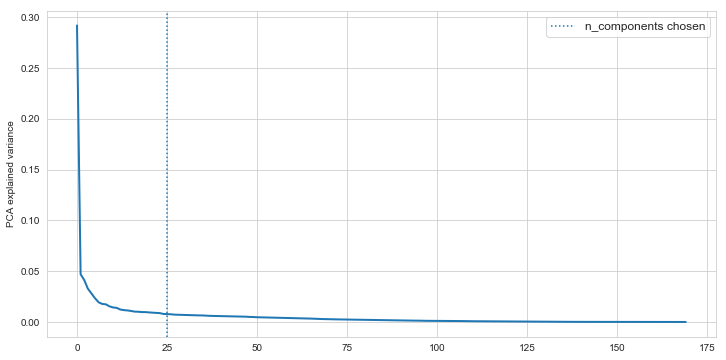

In [33]:
#To find the elbow 

pca.fit(X_scaled)

fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.axvline(gridModel.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

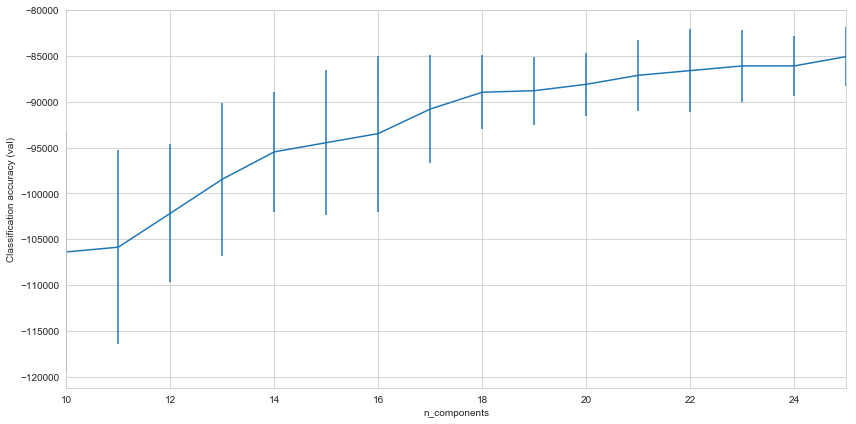

In [34]:
fig, ax1 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))

results = pd.DataFrame(gridModel.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

In [37]:
pcaTest = PCA(n_components=25)

In [38]:
log_model = LogisticRegression(C=0.1)

In [39]:
pipeTesting = Pipeline(steps=[("pcaTest",pcaTest),("log_model",log)])

In [40]:
pipeTesting.fit(X_scaled, np.ravel(y))

Pipeline(memory=None,
     steps=[('pcaTest', PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('log_model', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [41]:
pipePrediction = pipeTesting.predict(X_test)

In [42]:
getCost(y_test,pipePrediction)

Confusion Matrix

      FN     FP
TN  4272  11353
TP     5    370


Cost

    Score  Number of Type 1 faults  Number of Type 2 faults
0  116030                    11353                        5


In [43]:
scalerTesting = StandardScaler()
scalerTesting.fit(X_test)
X_test_scaled = scalerTesting.transform(X_test)

In [44]:
pipePrediction = pipeTesting.predict(X_test_scaled)

In [251]:
getCost(y_test,pipePrediction)

Confusion Matrix

       FN   FP
TN  15599   26
TP    240  135


Cost

    Score  Number of Type 1 faults  Number of Type 2 faults
0  120260                       26                      240
